In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

data=pd.read_csv("wine-clustering.csv")
data.head()



,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data)
data_scaled=scaler.transform(data)



## Elbow Methodu ile K değerini belirleme

k=1 inertia: 2314.0000000000005
k=2 inertia: 1661.6761165626503
k=3 inertia: 1277.928488844642
k=4 inertia: 1211.7531134671583
k=5 inertia: 1123.1565470796963
k=6 inertia: 1079.538509158826
k=7 inertia: 1014.4309086924652
k=8 inertia: 982.6549762937698
k=9 inertia: 927.956076072621
k=10 inertia: 879.4257007542494


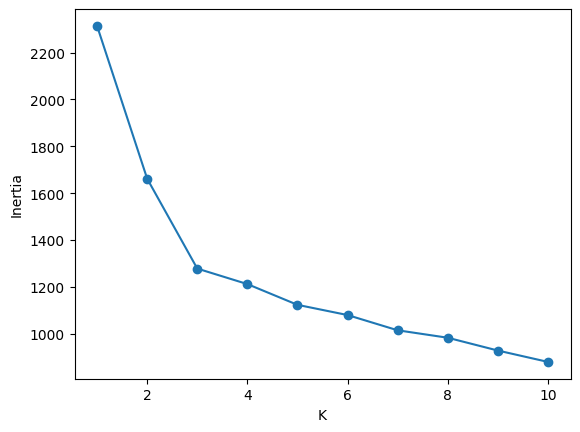

In [46]:
from sklearn.cluster import KMeans
inertia_list=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(data_scaled)
    inertia_list.append(kmeans.inertia_)
    print(f"k={i} inertia: {kmeans.inertia_}")

plt.plot(range(1,11),inertia_list,marker="o")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()


En uygun dirsek değeri 3 gibi görünüyor.


In [47]:
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(data_scaled)
data["cluster"]=kmeans.labels_


## Test verisi ile tahmin ve görselleştirme

In [48]:
test = scaler.transform([[13.72, 2.43, 2.87, 21.0, 118, 2.80, 2.69, 0.39, 1.82, 4.32, 1.04, 2.93, 735]])
kmeans.predict(test)

C:\Users\Ufuk\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2])

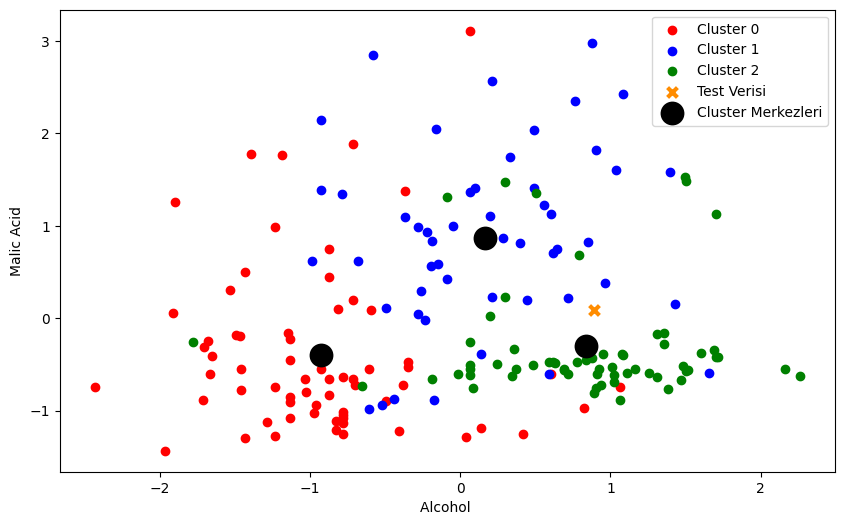

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))


plt.scatter(data_scaled[data.cluster==0][:,0], data_scaled[data.cluster==0][:,1], color='red', label='Cluster 0')
plt.scatter(data_scaled[data.cluster==1][:,0], data_scaled[data.cluster==1][:,1], color='blue', label='Cluster 1') 
plt.scatter(data_scaled[data.cluster==2][:,0], data_scaled[data.cluster==2][:,1], color='green', label='Cluster 2')
plt.scatter(test[:,0], test[:,1], color='darkorange', marker='x', s=50, linewidths=3, label='Test Verisi')


centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], color='black', marker='o', s=200, linewidths=3, label='Cluster Merkezleri')

plt.xlabel('Alcohol ')
plt.ylabel('Malic Acid') 
plt.legend()
plt.show()


# Hiyerarşik Kümeleme


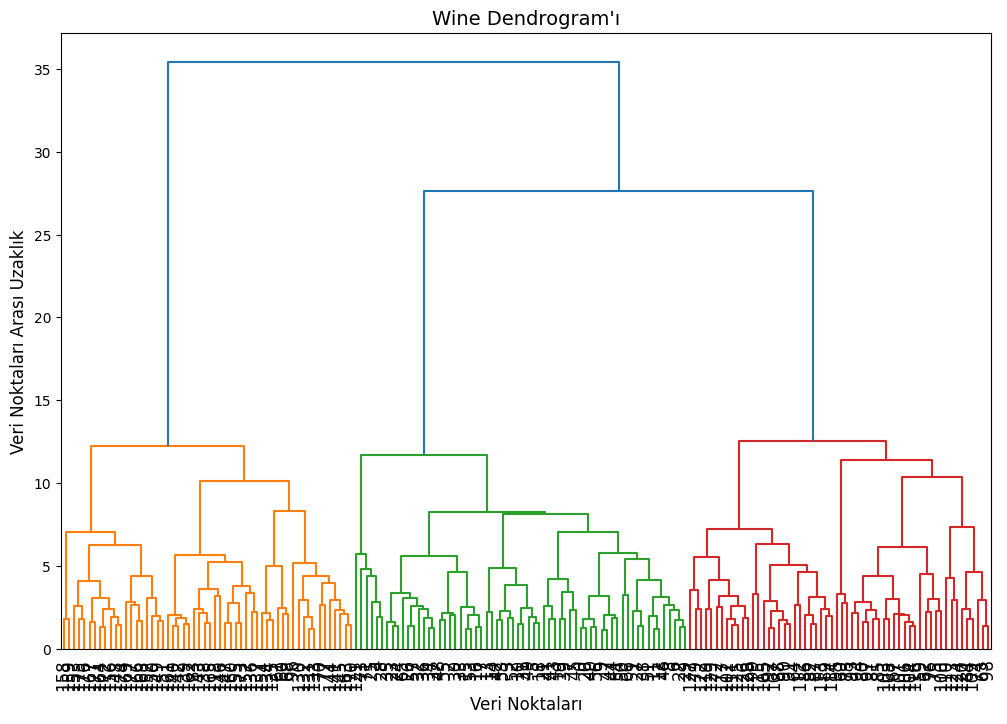

In [65]:
from scipy.cluster import hierarchy
plt.figure(figsize=(12, 8))  
dendrogram = hierarchy.dendrogram(hierarchy.linkage(data_scaled, method="ward"),
                                leaf_font_size=12)  
plt.title("Wine Dendrogram'ı", fontsize=14)
plt.xlabel("Veri Noktaları", fontsize=12)
plt.ylabel("Veri Noktaları Arası Uzaklık", fontsize=12)
plt.show()



Dendogramda görünen en uzun veri noktası arasındaki uzaklık 14 civarı. Bu noktadan çizilen yatay bir çizgi grafiği 3 noktada kesiyor. Oluşan nokta sayısı 3 olduğu için küme sayısı 3 olarak belirlendi.


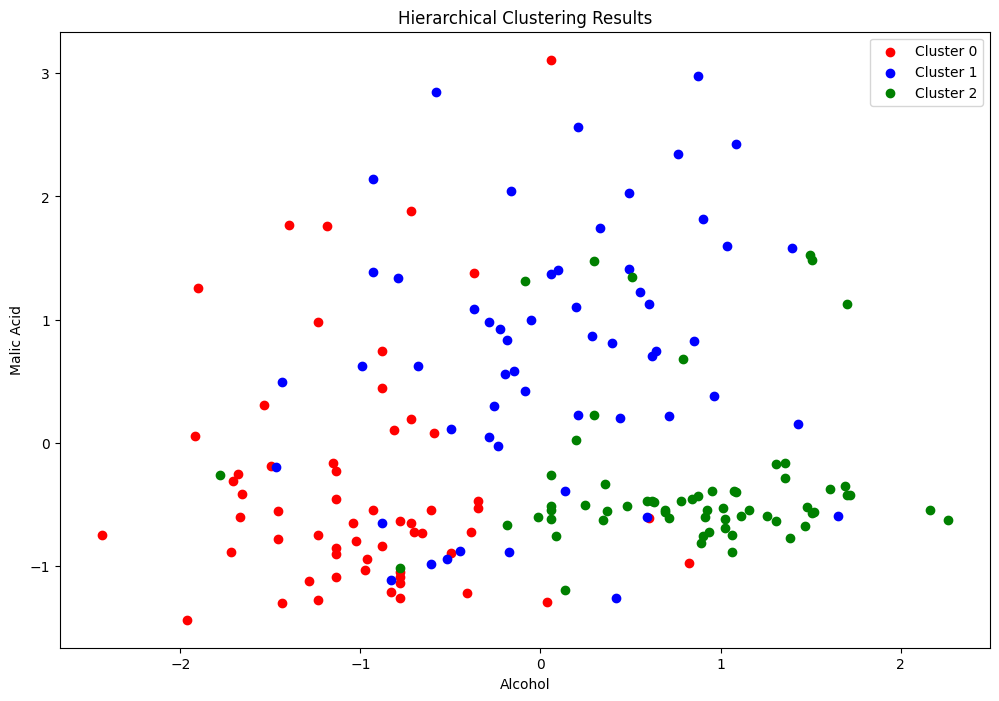

In [76]:
from sklearn.cluster import AgglomerativeClustering
agglomerative=AgglomerativeClustering(n_clusters=3,linkage="ward")
cluster_hc=agglomerative.fit_predict(data_scaled)
data["cluster_hc"]=cluster_hc

plt.figure(figsize=(12,8))
plt.scatter(data_scaled[data.cluster_hc==0][:,0], data_scaled[data.cluster_hc==0][:,1], color='red', label='Cluster 0')
plt.scatter(data_scaled[data.cluster_hc==1][:,0], data_scaled[data.cluster_hc==1][:,1], color='blue', label='Cluster 1')
plt.scatter(data_scaled[data.cluster_hc==2][:,0], data_scaled[data.cluster_hc==2][:,1], color='green', label='Cluster 2')

plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Hierarchical Clustering Results')
plt.legend()
plt.show()
